In [1]:
pip install  import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 


In [2]:
pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.4 MB/s 
     |████████████████████████████████| 3.2 MB 33.2 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9074 sha256=db9f3406423f79c77ac30a526e9847009d6e5096acd6d51436d319b0e99bbf40
  Stored in directory: /root/.cache/pip/wheels/74/1d/33/83ec153aa37c92957b2edb888f4f42fdea9b7ac89f4b919391
Successfully built python-igraph


In [4]:
import pandas as pd
import numpy as np
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from math import *
import pandas as pd
import import_ipynb 
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

from TOPSIS import Topsis

importing Jupyter notebook from TOPSIS.ipynb


Graph with 4039 nodes and 88234 edges


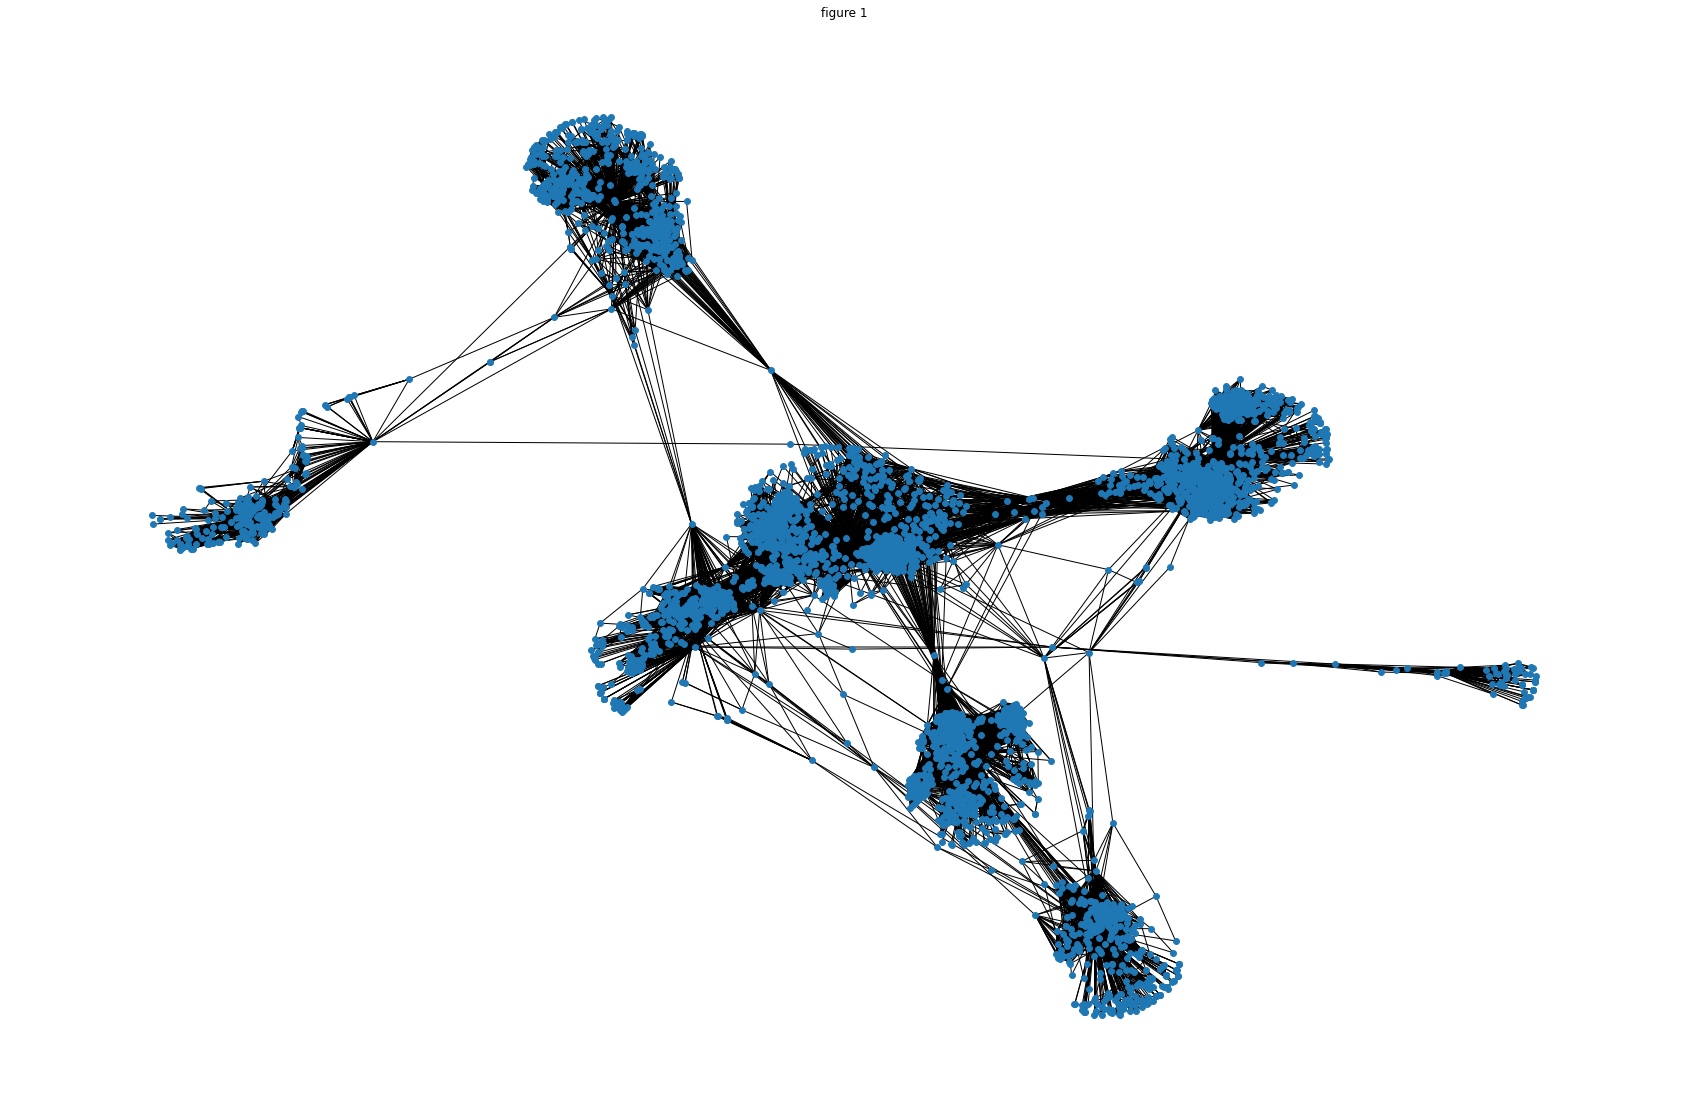

In [38]:
# Read facebook dataset
plt.figure(figsize=(30,20))
G=nx.read_edgelist('Data/fbData.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)
print(nx.info(G))
nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [39]:
# Centrality measures
deg_centrality = nx.degree_centrality(G)
close_centrality = nx.closeness_centrality(G)
bet_centrality = nx.betweenness_centrality(G)
eig_centrality=nx.eigenvector_centrality(G)

In [41]:
Matrix=pd.DataFrame()#create dataframe
for noued in G:
    #add the name of each node with its measures centrality
    Matrix=Matrix.append({'Node':str(noued),'w_Node':str(noued), 'DC':deg_centrality[noued], 'BC':bet_centrality[noued],
                        'CC':close_centrality[noued], 'EC':eig_centrality[noued]},ignore_index=True)
print(Matrix)
Matrix.to_csv("Data/Matrix.csv" ,index=False)

      Node w_Node        DC            BC        CC            EC
0        0      0  0.085934  1.463059e-01  0.353343  3.391796e-05
1        1      1  0.004210  2.783274e-06  0.261376  6.045346e-07
2        2      2  0.002476  7.595021e-08  0.261258  2.233461e-07
3        3      3  0.004210  1.685066e-06  0.261376  6.635648e-07
4        4      4  0.002476  1.840332e-07  0.261258  2.236416e-07
...    ...    ...       ...           ...       ...           ...
4034  4034   4034  0.000495  0.000000e+00  0.183989  2.951270e-10
4035  4035   4035  0.000248  0.000000e+00  0.183980  2.912901e-10
4036  4036   4036  0.000495  0.000000e+00  0.183989  2.931223e-10
4037  4037   4037  0.000991  7.156847e-08  0.184005  2.989233e-10
4038  4038   4038  0.002229  6.338922e-07  0.184047  8.915175e-10

[4039 rows x 6 columns]


In [7]:
Matrix = pd.read_csv("Data/Matrix.csv")

In [44]:
Matrix_arr= Matrix[['DC','BC','CC','EC']].to_numpy()

Matrix_arr

array([[8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [4.21000495e-03, 2.78327442e-06, 2.61376141e-01, 6.04534613e-07],
       [2.47647350e-03, 7.59502118e-08, 2.61257764e-01, 2.23346094e-07],
       ...,
       [4.95294700e-04, 0.00000000e+00, 1.83988700e-01, 2.93122343e-10],
       [9.90589401e-04, 7.15684688e-08, 1.84005468e-01, 2.98923251e-10],
       [2.22882615e-03, 6.33892152e-07, 1.84047402e-01, 8.91517473e-10]])

In [45]:
#ev_matrix_np 
m = 4039
ev_matrix_np = Matrix_arr
sum = np.zeros(4)

for i in range(m):
  for j in range(4):
    sum[j] += ev_matrix_np[i][j]

p = np.copy(ev_matrix_np)

for i in range(m):
  for j in range(4):
    p[i][j] = ev_matrix_np[i][j]/sum[j]


p

array([[1.96636217e-03, 5.43112731e-02, 3.16773794e-04, 2.17310380e-06],
       [9.63347462e-05, 1.03319931e-06, 2.34325259e-04, 3.87321761e-08],
       [5.66674978e-05, 2.81940242e-08, 2.34219133e-04, 1.43096525e-08],
       ...,
       [1.13334996e-05, 0.00000000e+00, 1.64946960e-04, 1.87801756e-11],
       [2.26669991e-05, 2.65674459e-08, 1.64961992e-04, 1.91518364e-11],
       [5.10007480e-05, 2.35311664e-07, 1.64999586e-04, 5.71189986e-11]])

In [46]:
k = 1/log(m)
E = []
plnp = []


for j in range(4):
  temp_sum = 0
  for i in range(m):
    try:
       pij = p[i][j]
       temp_sum += pij*log(pij)
    except:
      pij = 1
      temp_sum += pij*log(pij)
  E.append(-k*temp_sum)

E

[0.9387212054859051,
 0.4068097141455876,
 0.9989332168800653,
 0.6858078958901649]

In [47]:
D = []
for i in range(4):
  D.append(1-E[i])
D

[0.0612787945140949,
 0.5931902858544125,
 0.0010667831199346889,
 0.3141921041098351]

In [48]:
sm = np.sum(D)
weights = [D[i]/sm for i in range(4)]
weights

[0.06319173681858835,
 0.6117079280734424,
 0.001100084926473543,
 0.32400025018149564]

In [49]:
# Decision Matrix for w_topsis
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])

w_T = Topsis(Evaluation_matrix,weights,criteria)
w_T.calc()

Step 1
 [[8.59336305e-02 1.46305921e-01 3.53342667e-01 3.39179617e-05]
 [4.21000495e-03 2.78327442e-06 2.61376141e-01 6.04534613e-07]
 [2.47647350e-03 7.59502118e-08 2.61257764e-01 2.23346094e-07]
 ...
 [4.95294700e-04 0.00000000e+00 1.83988700e-01 2.93122343e-10]
 [9.90589401e-04 7.15684688e-08 1.84005468e-01 2.98923251e-10]
 [2.22882615e-03 6.33892152e-07 1.84047402e-01 8.91517473e-10]]

Step 2
 [[8.00164615e-02 1.97368601e-01 1.99619580e-02 3.39179617e-05]
 [3.92011483e-03 3.75467359e-06 1.47663445e-02 6.04534613e-07]
 [2.30594990e-03 1.02457829e-07 1.47596568e-02 2.23346094e-07]
 ...
 [4.61189980e-04 0.00000000e+00 1.03943708e-02 2.93122343e-10]
 [9.22379960e-04 9.65468003e-08 1.03953181e-02 2.98923251e-10]
 [2.07535491e-03 8.55128803e-07 1.03976871e-02 8.91517473e-10]]

Step 3
 [[5.05637918e-03 1.20731938e-01 2.19598490e-05 1.09894281e-05]
 [2.47718865e-04 2.29676360e-06 1.62442330e-05 1.95869366e-07]
 [1.45716979e-04 6.26742662e-08 1.62368760e-05 7.23641902e-08]
 ...
 [2.91433958

In [50]:
Evaluation_matrix = Matrix_arr
criteria = np.array([True,True,True,True])
weights = [0.1,0.1,0.4,0.4]

T = Topsis(Evaluation_matrix,weights,criteria)
T.calc()

Step 1
 [[8.59336305e-02 1.46305921e-01 3.53342667e-01 3.39179617e-05]
 [4.21000495e-03 2.78327442e-06 2.61376141e-01 6.04534613e-07]
 [2.47647350e-03 7.59502118e-08 2.61257764e-01 2.23346094e-07]
 ...
 [4.95294700e-04 0.00000000e+00 1.83988700e-01 2.93122343e-10]
 [9.90589401e-04 7.15684688e-08 1.84005468e-01 2.98923251e-10]
 [2.22882615e-03 6.33892152e-07 1.84047402e-01 8.91517473e-10]]

Step 2
 [[8.00164615e-02 1.97368601e-01 1.99619580e-02 3.39179617e-05]
 [3.92011483e-03 3.75467359e-06 1.47663445e-02 6.04534613e-07]
 [2.30594990e-03 1.02457829e-07 1.47596568e-02 2.23346094e-07]
 ...
 [4.61189980e-04 0.00000000e+00 1.03943708e-02 2.93122343e-10]
 [9.22379960e-04 9.65468003e-08 1.03953181e-02 2.98923251e-10]
 [2.07535491e-03 8.55128803e-07 1.03976871e-02 8.91517473e-10]]

Step 3
 [[8.00164615e-03 1.97368601e-02 7.98478318e-03 1.35671847e-05]
 [3.92011483e-04 3.75467359e-07 5.90653778e-03 2.41813845e-07]
 [2.30594990e-04 1.02457829e-08 5.90386272e-03 8.93384375e-08]
 ...
 [4.61189980

In [51]:
# S+ and S-
print("best_distance\t", T.best_distance)
print("worst_distance\t", T.worst_distance)

best_distance	 [0.0612611  0.07899563 0.07904475 ... 0.07921887 0.07920484 0.07916984]
worst_distance	 [0.02165309 0.00191426 0.00188714 ... 0.00013162 0.00014722 0.0002262 ]


In [52]:
# S+ and S-
print("best_distance\t", w_T.best_distance)
print("worst_distance\t", w_T.worst_distance)

best_distance	 [0.27770459 0.39800724 0.39801333 ... 0.39801783 0.39801666 0.39801343]
worst_distance	 [1.20837167e-01 2.33215783e-04 1.31246732e-04 ... 1.45760551e-05
 4.37165947e-05 1.16575313e-04]


In [53]:
print("worst_similarity\t", T.worst_similarity)
print("rank_to_worst_similarity\t", T.rank_to_worst_similarity())

worst_similarity	 [0.26115064 0.02365918 0.02331764 ... 0.00165866 0.00185533 0.00284905]
rank_to_worst_similarity	 [1947, 1838, 1921, 1895, 1987, 1845, 1896, 1890, 1889, 1931, 2000, 1863, 1998, 2001, 1936, 1934, 1903, 1997, 1978, 1948, 1850, 1867, 1881, 1837, 1992, 4013, 4011, 4026, 4024, 4017, 3988, 4036, 4014, 4031, 4004, 3991, 4037, 4030, 3987, 4009, 4033, 4035, 3995, 4034, 4008, 3994, 1846, 1937, 1942, 3993, 4027, 4018, 4010, 4038, 4002, 3999, 4006, 1871, 1835, 1848, 1913, 1879, 1886, 1907, 1958, 1856, 3996, 3989, 4015, 1954, 1836, 1967, 1962, 1892, 1932, 4020, 3992, 4005, 4029, 1853, 1959, 1996, 1861, 1902, 1905, 3985, 4021, 4022, 3990, 4028, 4003, 4039, 3998, 4019, 1972, 4012, 4007, 1982, 1945, 1888, 1897, 1869, 1862, 4000, 4023, 3997, 1935, 1858, 1908, 1983, 1989, 1928, 4016, 1940, 1868, 1860, 1878, 1882, 1914, 1990, 1839, 1909, 1911, 1985, 1952, 1968, 1917, 1979, 1977, 1876, 3986, 4001, 1883, 1924, 1964, 1887, 1855, 1941, 1852, 1955, 1929, 1925, 1923, 1866, 4025, 1901, 1894, 4

In [54]:
print("worst_similarity\t", w_T.worst_similarity)
print("rank_to_worst_similarity\t", w_T.rank_to_worst_similarity())

worst_similarity	 [3.03198259e-01 5.85615499e-04 3.29645914e-04 ... 3.66202722e-05
 1.09824030e-04 2.92807154e-04]
rank_to_worst_similarity	 [1838, 1947, 4013, 4011, 4036, 3988, 4024, 4026, 4017, 2022, 2030, 2038, 2037, 3498, 3604, 3677, 3731, 3749, 3979, 3767, 3813, 3869, 3866, 3496, 3944, 3835, 38, 211, 115, 288, 210, 216, 293, 44, 12, 16, 13, 75, 336, 19, 1761, 1751, 1764, 1809, 1777, 1787, 1813, 1768, 1765, 1527, 1697, 1604, 2576, 2712, 2613, 2407, 2755, 693, 606, 1068, 873, 1047, 1320, 398, 583, 953, 405, 632, 1987, 1921, 1895, 1845, 1896, 1890, 4014, 4004, 4031, 3991, 4037, 4030, 3987, 4009, 4033, 4035, 2006, 3765, 3860, 3895, 3886, 3822, 3931, 3966, 3823, 3752, 3867, 3889, 3726, 3951, 3621, 3711, 245, 283, 234, 257, 34, 43, 146, 91, 256, 242, 206, 53, 155, 217, 71, 36, 280, 139, 268, 287, 306, 48, 161, 184, 317, 154, 235, 1747, 1790, 1794, 1563, 1600, 1624, 1544, 1542, 2787, 2911, 2358, 2422, 2671, 2912, 2662, 2800, 2554, 1507, 1508, 354, 711, 881, 552, 813, 757, 1340, 917, 1241

In [55]:
print("best_similarity\t", T.best_similarity)
print("rank_to_best_similarity\t", T.rank_to_best_similarity())

best_similarity	 [0.73884936 0.97634082 0.97668236 ... 0.99834134 0.99814467 0.99715095]
rank_to_best_similarity	 [108, 353, 352, 1822, 2146, 3147, 3170, 3107, 3339, 3158, 3059, 3097, 3297, 3003, 3179, 3371, 2996, 3166, 3176, 3243, 2155, 3067, 3054, 3102, 3160, 3442, 3223, 3432, 3045, 3265, 3446, 3440, 3444, 3136, 3069, 3408, 3143, 2994, 2967, 3430, 3236, 2965, 3111, 3439, 3092, 2963, 3126, 2945, 3025, 2977, 3239, 2168, 3457, 3458, 3434, 3210, 3412, 3201, 3311, 3049, 3450, 3134, 3081, 3300, 3235, 3080, 3237, 3366, 3198, 3104, 3361, 1491, 3253, 3438, 3284, 3242, 3274, 3072, 3296, 2995, 3383, 3254, 3035, 2985, 3271, 3462, 3033, 3402, 3105, 2990, 3026, 3269, 3479, 3098, 3142, 3261, 3204, 3337, 3137, 3251, 3468, 3085, 3424, 3407, 2981, 3306, 3377, 3055, 3398, 3452, 3291, 3052, 3030, 3327, 3352, 3399, 3266, 3019, 2946, 3113, 3095, 3088, 3222, 3185, 3214, 3295, 3008, 3419, 3478, 3400, 2955, 3409, 3202, 3074, 3248, 3188, 3368, 3257, 3316, 2997, 3096, 3063, 3313, 2225, 3031, 3221, 3363, 3277, 

In [56]:
print("best_similarity\t", w_T.best_similarity)
print("rank_to_best_similarity\t", w_T.rank_to_best_similarity())

best_similarity	 [0.69680174 0.99941438 0.99967035 ... 0.99996338 0.99989018 0.99970719]
rank_to_best_similarity	 [108, 352, 1822, 353, 572, 1, 1844, 1711, 59, 351, 372, 2007, 350, 1064, 349, 1204, 2146, 3147, 3170, 3107, 3339, 3158, 3059, 3097, 3297, 3003, 3179, 3371, 3176, 3166, 3243, 2996, 3067, 3054, 3160, 3102, 3442, 3045, 3223, 3432, 2155, 3265, 3446, 3440, 3444, 3069, 3136, 3408, 3143, 2994, 3430, 2967, 1832, 2965, 3236, 3111, 3439, 3092, 2963, 3126, 2945, 3025, 2977, 3239, 3457, 2168, 3458, 3434, 3210, 3412, 3201, 3311, 3049, 3450, 3134, 3081, 3300, 1491, 3235, 1755, 3080, 3237, 3366, 3198, 3104, 3361, 3253, 3438, 3284, 3242, 3274, 3072, 3296, 2995, 3383, 3254, 3035, 2985, 3271, 3462, 3033, 3402, 3105, 2990, 3026, 3269, 3479, 3098, 3142, 3261, 3337, 3204, 3137, 3251, 3468, 3085, 137, 3424, 3407, 3306, 3377, 2981, 3055, 3398, 3452, 3291, 3052, 3327, 3030, 3352, 3399, 3266, 3019, 2946, 3113, 3095, 3088, 3222, 3185, 3214, 3295, 3008, 3419, 3478, 3400, 2955, 3202, 3409, 3074, 3248,

In [57]:
#Convert S+ and S- to array numpy
Best_Dist = np.array(T.best_distance)
Worst_Dist = np.array(T.worst_distance)

In [58]:
#Convert S+ and S- to array numpy
w_Best_Dist = np.array(w_T.best_distance)
w_Worst_Dist = np.array(w_T.worst_distance)

Calculate Closness


In [59]:
Closnness = []
Closnness = Worst_Dist / (Worst_Dist + Best_Dist)

In [60]:
w_Closnness = []
w_Closnness = w_Worst_Dist / (w_Worst_Dist + w_Best_Dist)

In [61]:
#Convert S+, S- and Closnness to DataFrame 
Worst_Distance = pd.DataFrame(Worst_Dist,columns=['S-'])
Best_Distance = pd.DataFrame(Best_Dist,columns=['S+'])
Clos = pd.DataFrame(Closnness,columns=['C'])
# Concatenate results
Out = pd.concat([Best_Distance, Worst_Distance, Clos], axis=1)
Out

,S+,S-,C
0,0.061261,0.021653,0.261151
1,0.078996,0.001914,0.023659
2,0.079045,0.001887,0.023318
3,0.078996,0.001914,0.023659
4,0.079045,0.001887,0.023318
...,...,...,...
4034,0.079219,0.000132,0.001659
4035,0.079226,0.000129,0.001631
4036,0.079219,0.000132,0.001659
4037,0.079205,0.000147,0.001855


In [62]:
#Convert S+, S- and Closnness to DataFrame 
w_Worst_Distance = pd.DataFrame(w_Worst_Dist,columns=['S-'])
w_Best_Distance = pd.DataFrame(w_Best_Dist,columns=['S+'])
w_Clos = pd.DataFrame(w_Closnness,columns=['C'])
# Concatenate results
w_Out = pd.concat([w_Best_Distance, w_Worst_Distance, w_Clos], axis=1)
w_Out

,S+,S-,C
0,0.277705,1.208372e-01,3.031983e-01
1,0.398007,2.332158e-04,5.856155e-04
2,0.398013,1.312467e-04,3.296459e-04
3,0.398008,2.332086e-04,5.855962e-04
4,0.398013,1.312468e-04,3.296462e-04
...,...,...,...
4034,0.398018,1.457606e-05,3.662027e-05
4035,0.398018,3.558509e-07,8.940556e-07
4036,0.398018,1.457606e-05,3.662027e-05
4037,0.398017,4.371659e-05,1.098240e-04


In [63]:
#sort DataFrame by Closnness Column (Descending)
Out = Out.sort_values(by="C",ascending=False)
Out

# Save it into a csv file (out.csv)
Out.to_csv("Data/Out.csv",index=False)

In [64]:
#sort DataFrame by Closnness Column (Descending)
w_Out = w_Out.sort_values(by="C",ascending=False)
w_Out

# Save it into a csv file (out.csv)
w_Out.to_csv("Data/w_Out.csv",index=False)

In [65]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
C = ranking_closness(Closnness)
C



[107,
 352,
 351,
 1821,
 2145,
 3146,
 3169,
 3106,
 3338,
 3157,
 3058,
 3096,
 3296,
 3002,
 3178,
 3370,
 2995,
 3165,
 3175,
 3242,
 2154,
 3066,
 3053,
 3101,
 3159,
 3441,
 3222,
 3431,
 3044,
 3264,
 3445,
 3439,
 3443,
 3135,
 3068,
 3407,
 3142,
 2993,
 2966,
 3429,
 3235,
 2964,
 3110,
 3438,
 3091,
 2962,
 3125,
 2944,
 3024,
 2976,
 3238,
 2167,
 3456,
 3457,
 3433,
 3209,
 3411,
 3200,
 3310,
 3048,
 3449,
 3133,
 3080,
 3299,
 3234,
 3079,
 3236,
 3365,
 3197,
 3103,
 3360,
 1490,
 3252,
 3437,
 3283,
 3241,
 3273,
 3071,
 3295,
 2994,
 3382,
 3253,
 3034,
 2984,
 3270,
 3461,
 3032,
 3401,
 3104,
 2989,
 3025,
 3268,
 3478,
 3097,
 3141,
 3260,
 3203,
 3336,
 3136,
 3250,
 3467,
 3084,
 3423,
 3406,
 2980,
 3305,
 3376,
 3054,
 3397,
 3451,
 3290,
 3051,
 3029,
 3326,
 3351,
 3398,
 3265,
 3018,
 2945,
 3112,
 3094,
 3087,
 3221,
 3184,
 3213,
 3294,
 3007,
 3418,
 3477,
 3399,
 2954,
 3408,
 3201,
 3073,
 3247,
 3187,
 3367,
 3256,
 3315,
 2996,
 3095,
 3062,
 3312,
 2

In [66]:
#Call the function Ranking_closness
#Function return the index of the grather value(Closness vector) based on a descending order
def ranking_closness(data):
    return [i for i in data.argsort()[-len(data):][::-1]]
#Call the function Ranking_closness
w_C = ranking_closness(w_Closnness)
w_C



[107,
 351,
 1821,
 352,
 571,
 0,
 1843,
 1710,
 58,
 350,
 371,
 2006,
 349,
 1063,
 348,
 1203,
 2145,
 3146,
 3169,
 3106,
 3338,
 3157,
 3058,
 3096,
 3296,
 3002,
 3178,
 3370,
 3175,
 3165,
 3242,
 2995,
 3066,
 3053,
 3159,
 3101,
 3441,
 3044,
 3222,
 3431,
 2154,
 3264,
 3445,
 3439,
 3443,
 3068,
 3135,
 3407,
 3142,
 2993,
 3429,
 2966,
 1831,
 2964,
 3235,
 3110,
 3438,
 3091,
 2962,
 3125,
 2944,
 3024,
 2976,
 3238,
 3456,
 2167,
 3457,
 3433,
 3209,
 3411,
 3200,
 3310,
 3048,
 3449,
 3133,
 3080,
 3299,
 1490,
 3234,
 1754,
 3079,
 3236,
 3365,
 3197,
 3103,
 3360,
 3252,
 3437,
 3283,
 3241,
 3273,
 3071,
 3295,
 2994,
 3382,
 3253,
 3034,
 2984,
 3270,
 3461,
 3032,
 3401,
 3104,
 2989,
 3025,
 3268,
 3478,
 3097,
 3141,
 3260,
 3336,
 3203,
 3136,
 3250,
 3467,
 3084,
 136,
 3423,
 3406,
 3305,
 3376,
 2980,
 3054,
 3397,
 3451,
 3290,
 3051,
 3326,
 3029,
 3351,
 3398,
 3265,
 3018,
 2945,
 3112,
 3094,
 3087,
 3221,
 3184,
 3213,
 3294,
 3007,
 3418,
 3477,
 3399,

In [67]:

#retrieve the nodes that correspond to the indices returned by the function above
Tab = []
for i in range(len(C)):
       Tab.append(Matrix['Node'].loc[C[i]])
        
Tab

['107',
 '1912',
 '1684',
 '3437',
 '2266',
 '2206',
 '2233',
 '2142',
 '2464',
 '2218',
 '2078',
 '2123',
 '2410',
 '1993',
 '2244',
 '2507',
 '1985',
 '2229',
 '2240',
 '2340',
 '2347',
 '2088',
 '2073',
 '2131',
 '2220',
 '2604',
 '2309',
 '2590',
 '2059',
 '2369',
 '2611',
 '2602',
 '2607',
 '2188',
 '2090',
 '2560',
 '2201',
 '1983',
 '1946',
 '2586',
 '2324',
 '1943',
 '2150',
 '2601',
 '2118',
 '1938',
 '2172',
 '1917',
 '2030',
 '1962',
 '2331',
 '2542',
 '2624',
 '2625',
 '2593',
 '2290',
 '2564',
 '2275',
 '2428',
 '2064',
 '2615',
 '2184',
 '2104',
 '2414',
 '2323',
 '2103',
 '2326',
 '2500',
 '2271',
 '2139',
 '2492',
 '2543',
 '2354',
 '2600',
 '2395',
 '2339',
 '2381',
 '2093',
 '2409',
 '1984',
 '2526',
 '2356',
 '2045',
 '1971',
 '2376',
 '2630',
 '2043',
 '2553',
 '2140',
 '1979',
 '2033',
 '2374',
 '2655',
 '2124',
 '2200',
 '2363',
 '2278',
 '2460',
 '2190',
 '2352',
 '2638',
 '2108',
 '2578',
 '2559',
 '1966',
 '2423',
 '2520',
 '2074',
 '2549',
 '2619',
 '2404',
 '

In [69]:

#retrieve the nodes that correspond to the indices returned by the function above
w_Tab = []
for i in range(len(w_C)):
       w_Tab.append(Matrix['w_Node'].loc[w_C[i]])
        
w_Tab

['107',
 '1684',
 '3437',
 '1912',
 '1085',
 '0',
 '698',
 '567',
 '58',
 '428',
 '563',
 '860',
 '414',
 '1577',
 '348',
 '1718',
 '2266',
 '2206',
 '2233',
 '2142',
 '2464',
 '2218',
 '2078',
 '2123',
 '2410',
 '1993',
 '2244',
 '2507',
 '2240',
 '2229',
 '2340',
 '1985',
 '2088',
 '2073',
 '2220',
 '2131',
 '2604',
 '2059',
 '2309',
 '2590',
 '2347',
 '2369',
 '2611',
 '2602',
 '2607',
 '2090',
 '2188',
 '2560',
 '2201',
 '1983',
 '2586',
 '1946',
 '686',
 '1943',
 '2324',
 '2150',
 '2601',
 '2118',
 '1938',
 '2172',
 '1917',
 '2030',
 '1962',
 '2331',
 '2624',
 '2542',
 '2625',
 '2593',
 '2290',
 '2564',
 '2275',
 '2428',
 '2064',
 '2615',
 '2184',
 '2104',
 '2414',
 '2543',
 '2323',
 '594',
 '2103',
 '2326',
 '2500',
 '2271',
 '2139',
 '2492',
 '2354',
 '2600',
 '2395',
 '2339',
 '2381',
 '2093',
 '2409',
 '1984',
 '2526',
 '2356',
 '2045',
 '1971',
 '2376',
 '2630',
 '2043',
 '2553',
 '2140',
 '1979',
 '2033',
 '2374',
 '2655',
 '2124',
 '2200',
 '2363',
 '2460',
 '2278',
 '2190'

In [70]:
#Convert Tab above to DataFrame 
Tab_Data=pd.DataFrame(Tab,columns=["Node"])

Tab_Data["Node"].to_csv("Data/Topsis.csv",index=False)

In [71]:
#Convert Tab above to DataFrame 
w_Tab_Data=pd.DataFrame(w_Tab,columns=["w_Node"])

w_Tab_Data["w_Node"].to_csv("Data/w_Topsis.csv",index=False)

In [72]:
Final_Tab = pd.concat([pd.read_csv("Data/Out.csv"),Tab_Data],axis=1)

Final_Tab.head(10)

,S+,S-,C,Node
0,0.038059,0.069440,0.645964,107
1,0.034631,0.052256,0.601426,1912
2,0.043164,0.049325,0.533306,1684
3,0.051827,0.034388,0.398863,3437
4,0.067449,0.035284,0.343452,2266
5,0.067869,0.034810,0.339017,2206
6,0.067798,0.034502,0.337266,2233
7,0.067832,0.034112,0.334613,2142
8,0.067965,0.034083,0.333989,2464
9,0.067947,0.034044,0.333790,2218


In [73]:
w_Final_Tab = pd.concat([pd.read_csv("Data/w_Out.csv"),w_Tab_Data],axis=1)

w_Final_Tab.head(10)

,S+,S-,C,w_Node
0,0.030827,0.396816,0.927913,107
1,0.121818,0.278989,0.696069,1684
2,0.204166,0.195005,0.488526,3437
3,0.207353,0.192038,0.480827,1912
4,0.275667,0.122971,0.308478,1085
5,0.277705,0.120837,0.303198,0
6,0.303269,0.095176,0.238868,698
7,0.318873,0.079481,0.199523,567
8,0.328695,0.069615,0.174775,58
9,0.345094,0.053094,0.133340,428


In [74]:
K = 10

for i in range(K):
    print("The",i+1,"top influential node is ",Final_Tab["Node"][i])

The 1 top influential node is  107
The 2 top influential node is  1912
The 3 top influential node is  1684
The 4 top influential node is  3437
The 5 top influential node is  2266
The 6 top influential node is  2206
The 7 top influential node is  2233
The 8 top influential node is  2142
The 9 top influential node is  2464
The 10 top influential node is  2218


In [76]:
K = 10

for i in range(K):
    print("The",i+1,"top influential node is ",w_Final_Tab["w_Node"][i])

The 1 top influential node is  107
The 2 top influential node is  1684
The 3 top influential node is  3437
The 4 top influential node is  1912
The 5 top influential node is  1085
The 6 top influential node is  0
The 7 top influential node is  698
The 8 top influential node is  567
The 9 top influential node is  58
The 10 top influential node is  428


In [77]:
Out1 = pd.concat([Matrix, Clos], axis=1)
Out1
Out1 = Out1.sort_values(by="C",ascending=False)
Out1

# Save it into a csv file (out.csv)
Out1.to_csv("Data/Out1.csv",index=False)

In [78]:
w_Out1 = pd.concat([Matrix, w_Clos], axis=1)
w_Out1
w_Out1 = w_Out1.sort_values(by="C",ascending=False)
w_Out1

# Save it into a csv file (out.csv)
w_Out1.to_csv("Data/w_Out1.csv",index=False)

**The top-10 ranked nodes by Topsis and Centrality measures**

In [80]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = Out1[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCR.csv",index=False)

In [79]:
#The top-10 ranked nodes by degree centrality (DC)
w_DCR = w_Out1[["w_Node", "DC"]]
w_DCR = w_DCR.sort_values(by='DC', ascending=False)
w_DCR.rename(columns = {'w_Node':'w_DCN'}, inplace=True)

w_DCR["w_DCN"].to_csv("Data/w_DCR.csv",index=False)

In [81]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = Out1[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCR.csv",index=False)

In [84]:
#The top-10 ranked nodes by betweenness centrality (BC)
w_BCR = w_Out1[["w_Node", "BC"]]
w_BCR = w_BCR.sort_values(by='BC', ascending=False)
w_BCR.rename(columns = {'w_Node':'w_BCN'}, inplace=True)

w_BCR["w_BCN"].to_csv("Data/w_BCR.csv",index=False)

In [86]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = Out1[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCR.csv",index=False)

In [85]:
#The top-10 ranked nodes by closeness centrality (CC)
w_CCR = w_Out1[["w_Node", "CC"]]
w_CCR = w_CCR.sort_values(by='CC', ascending=False)
w_CCR.rename(columns = {'w_Node':'w_CCN'}, inplace=True)

w_CCR["w_CCN"].to_csv("Data/w_CCR.csv",index=False)

In [93]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = Out1[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECR.csv",index=False)

In [94]:
#The top-10 ranked nodes by eigenvector centrality (EC)
w_ECR = Out1[["w_Node", "EC"]]
w_ECR = w_ECR.sort_values(by='EC', ascending=False)
w_ECR.rename(columns = {'w_Node':'w_ECN'}, inplace=True)

w_ECR["w_ECN"].to_csv("Data/w_ECR.csv",index=False)

In [100]:
fac = pd.concat([pd.read_csv("Data/DCR.csv"),pd.read_csv("Data/BCR.csv"), pd.read_csv("Data/CCR.csv"), pd.read_csv("Data/ECR.csv")],axis=1)


In [101]:
w_fac = pd.concat([pd.read_csv("Data/w_DCR.csv"),pd.read_csv("Data/w_BCR.csv"), pd.read_csv("Data/w_CCR.csv"), pd.read_csv("Data/w_ECR.csv")],axis=1)


In [102]:
#Concate the results
facebook = pd.concat([fac,pd.read_csv("Data/Topsis.csv")],axis=1)

facebook = facebook.head(10)
facebook

,DCN,BCN,CCN,ECN,Node
0,107.0,107.0,107.0,1912.0,107
1,1684.0,1684.0,58.0,2266.0,1912
2,1912.0,3437.0,428.0,2206.0,1684
3,3437.0,1912.0,563.0,2233.0,3437
4,0.0,1085.0,1684.0,2464.0,2266
5,2543.0,0.0,171.0,2142.0,2206
6,2347.0,698.0,348.0,2218.0,2233
7,1888.0,567.0,483.0,2078.0,2142
8,1800.0,58.0,414.0,2123.0,2464
9,1663.0,428.0,376.0,1993.0,2218


In [103]:
#Concate the results
w_facebook = pd.concat([w_fac,pd.read_csv("Data/w_Topsis.csv")],axis=1)

w_facebook = w_facebook.head(10)
w_facebook

,w_DCN,w_BCN,w_CCN,w_ECN,w_Node
0,107,107,107,1912,107
1,1684,1684,58,2266,1684
2,1912,3437,428,2206,3437
3,3437,1912,563,2233,1912
4,0,1085,1684,2464,1085
5,2543,0,171,2142,0
6,2347,698,348,2218,698
7,1888,567,483,2078,567
8,1800,58,414,2123,58
9,1663,428,376,1993,428


**Application SI Model**

In [104]:
def SI(node):
    n = 4039
    model = ep.SIModel(G)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [105]:
Rank_DC = SI(set(facebook['DCN']))
Rank_BC = SI(set(facebook['BCN']))
Rank_CC = SI(set(facebook['CCN']))
Rank_EC = SI(set(facebook['ECN']))
Rank_Topsis = SI(set(facebook['Node']))

In [106]:
w_Rank_DC = SI(set(w_facebook['w_DCN']))
w_Rank_BC = SI(set(w_facebook['w_BCN']))
w_Rank_CC = SI(set(w_facebook['w_CCN']))
w_Rank_EC = SI(set(w_facebook['w_ECN']))
w_Rank_Topsis = SI(set(w_facebook['w_Node']))

In [111]:
Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,4029,10
1,1,919,3120
2,2,201,3838
3,3,55,3984
4,4,0,4039


In [112]:
w_Rank_Topsis

,iteration,nb_Susceptible,Nb_infected
0,0,4029,10
1,1,429,3610
2,2,55,3984
3,3,0,4039


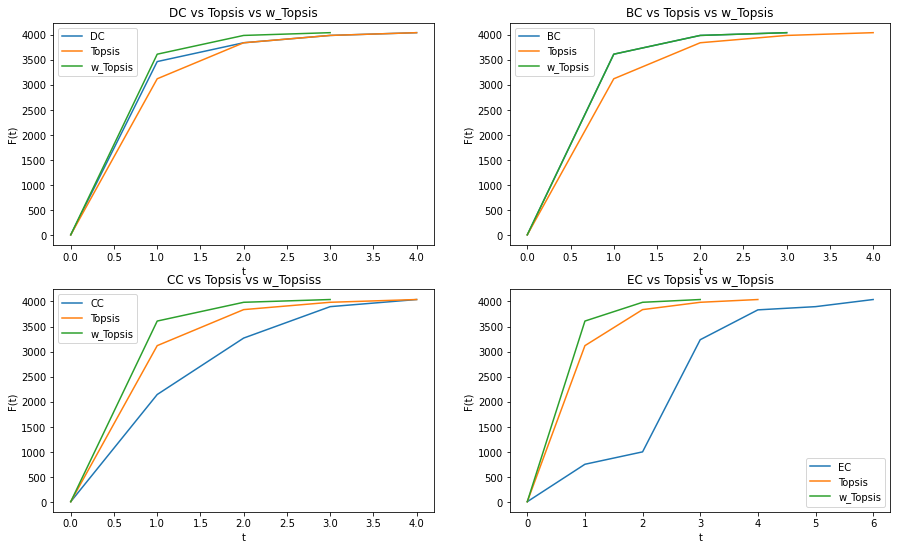

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(Rank_DC['iteration'], Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 0].set_title("DC vs Topsis vs w_Topsis")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC['iteration'], Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[0, 1].set_title("BC vs Topsis vs w_Topsis")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC['iteration'], Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 0].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 0].set_title("CC vs Topsis vs w_Topsiss")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC['iteration'], Rank_EC['Nb_infected'], label="EC")
axs[1, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 1].plot(w_Rank_Topsis['iteration'], w_Rank_Topsis['Nb_infected'], label="w_Topsis")
axs[1, 1].set_title("EC vs Topsis vs w_Topsis")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')